#  SALES PREDICTION to Maximizing sales using data science

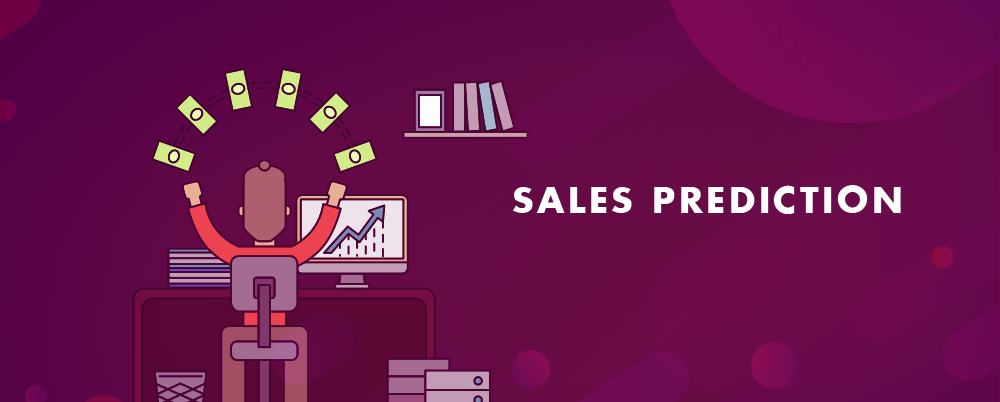

In [49]:
from IPython.display import Image
img = 'sales.PNG' 
Image(filename=img)

# Objective 


Q1 What is the overall sales trend?

Q2 Which are the top 10 productss by sales?

Q3. Which are the most selling products? 

Q4 Which is most prefered shiping mpode?

Q5 Which are the  most profitable category and sub-category ?

## GETTING KNOW ABOUT DATASET

#### IMPORT LIBRARIES

In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### IMPORT DATASET

In [51]:
df=pd.read_excel("store_sales.xlsx")

#### DISPLAY DATASET FIRST ROWS

In [52]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [53]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011


#### GETTING KNOW ABOUT DATSET SHAPE & COLUMNS

In [54]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [55]:
for columns in df.columns:
        print(columns)

order_id
order_date
ship_date
ship_mode
customer_name
segment
state
country
market
region
product_id
category
sub_category
product_name
sales
quantity
discount
profit
shipping_cost
order_priority
year


In [56]:
df.shape

(51290, 21)

#### GET INFORMATIONS ABOUT DATASET

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

## DATA CLEANING

#### CHECK NULL VALUES

In [58]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

#### GET DESCRIPTIVE STATISTICS ABOUT DATASET

In [59]:
df.describe().round(2)

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.49,3.48,0.14,28.64,26.38,2012.78
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.44,1.00,0.00,-6599.98,0.00,2011.00
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.76,2.00,0.00,0.00,2.61,2012.00
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.05,3.00,0.00,9.24,7.79,2013.00
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.05,5.00,0.20,36.81,24.45,2014.00
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.48,14.00,0.85,8399.98,933.57,2014.00
std,NaN,NaN,487.57,2.28,0.21,174.42,57.30,1.10


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

# Q1. What is the overall sales trends?

In [61]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


#### DRIVE YEAR AND MONTH FROM 'order_date' FOR FUTURE ANALYSIS

In [62]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [63]:
df['month_year'].sample(10)

40610    2014-07
7248     2011-11
14260    2012-08
10494    2012-03
32926    2013-12
26092    2013-07
44328    2014-09
48905    2014-11
49182    2014-12
39280    2014-06
Name: month_year, dtype: object

In [64]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12


## EXPLORATORY ANALYSIS

#### GROUP SALES BY MONTHS

In [65]:
df_sale=df.groupby('month_year').sum()['sales'].reset_index()
df_sale


,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


### VISUALIZE SALES TREND BY MONTHS


### 1

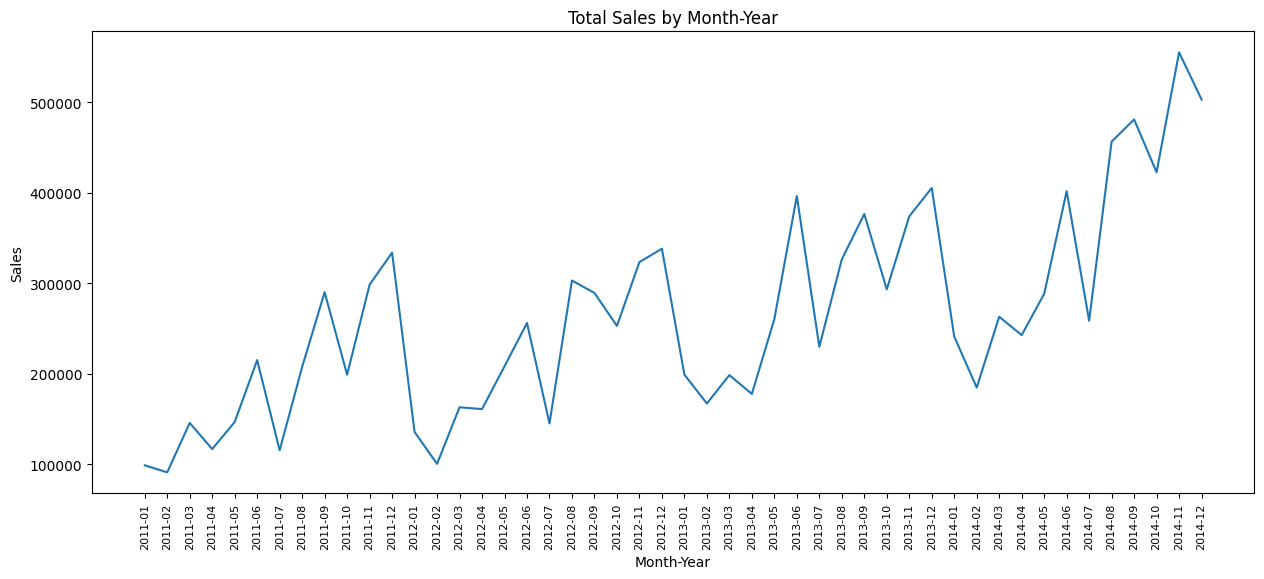

In [66]:
plt.figure(figsize=(15,6))
plt.plot(df_sale['month_year'],df_sale['sales'])
plt.xticks(rotation='vertical',size=8)
plt.title('Total Sales by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.show()

### 2

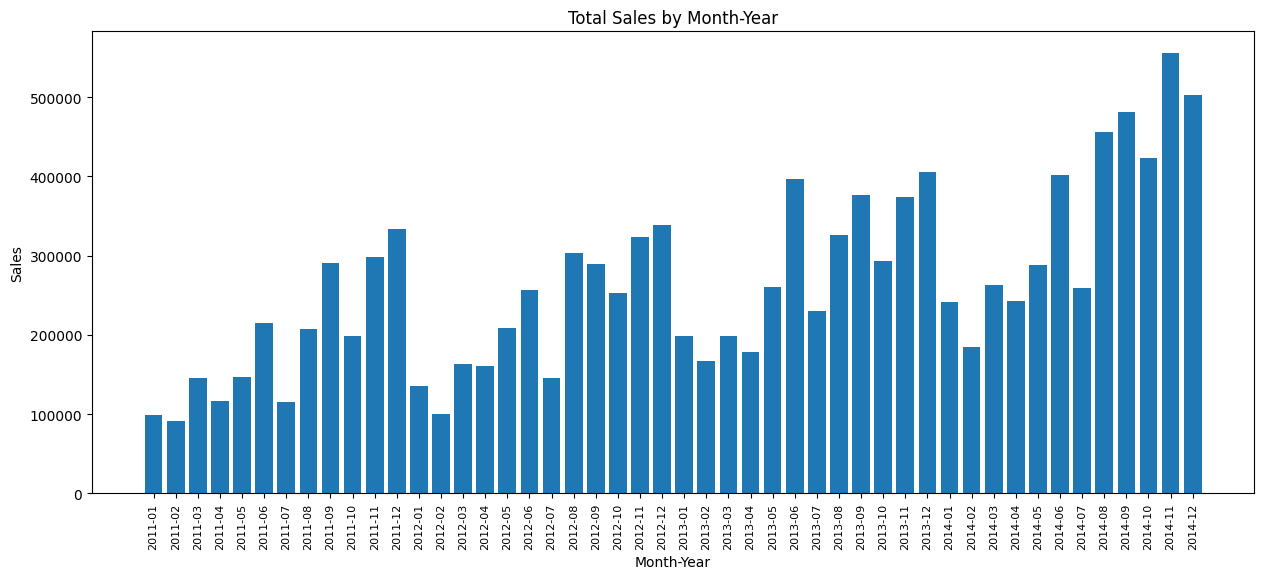

In [67]:
plt.figure(figsize=(15,6))
plt.bar(df_sale['month_year'],df_sale['sales'])
plt.xticks(rotation='vertical',size=8)
plt.title('Total Sales by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.show()


#### GROUP SALES BY YEARS

In [68]:
df[['year']].value_counts()

year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

In [69]:
df_sa=df.groupby('year').sum()['sales'].reset_index()
df_sa

,year,sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


### VISUALIZE SALES TREND BY YEARS

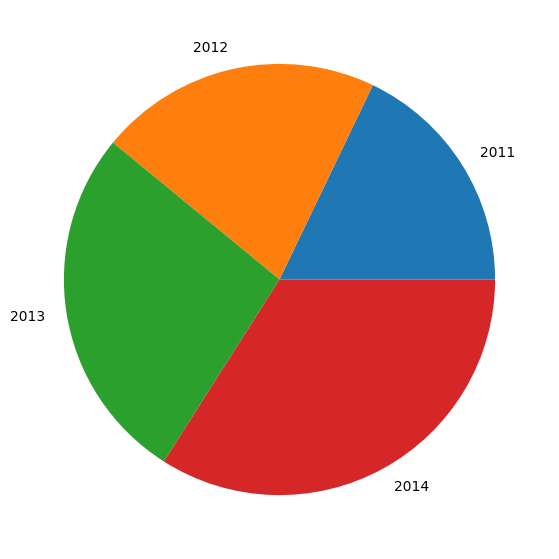

In [70]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df_sa['sales'], labels = df_sa['year'])
  
# show plot
plt.show()

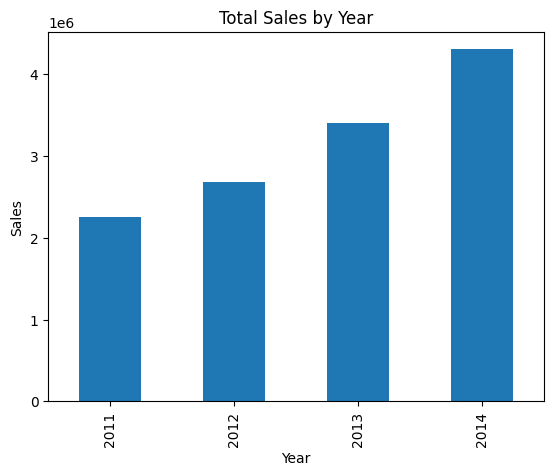

In [71]:
df_sa=df.groupby('year').sum()['sales']

df_sa.plot(kind='bar')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

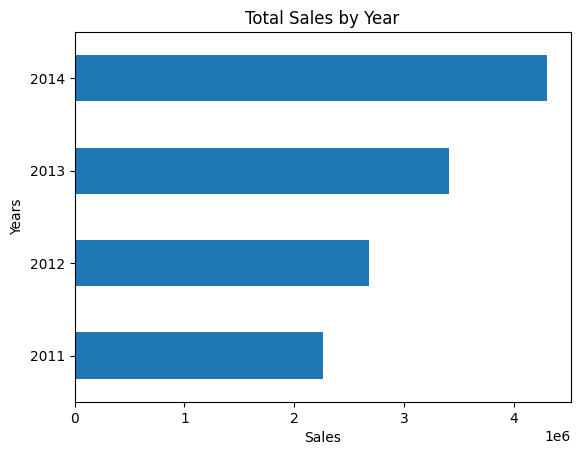

In [72]:
df_sa=df.groupby('year').sum()['sales']

df_sa.plot(kind='barh')
plt.title('Total Sales by Year')
plt.xlabel('Sales')
plt.ylabel('Years')
plt.show()

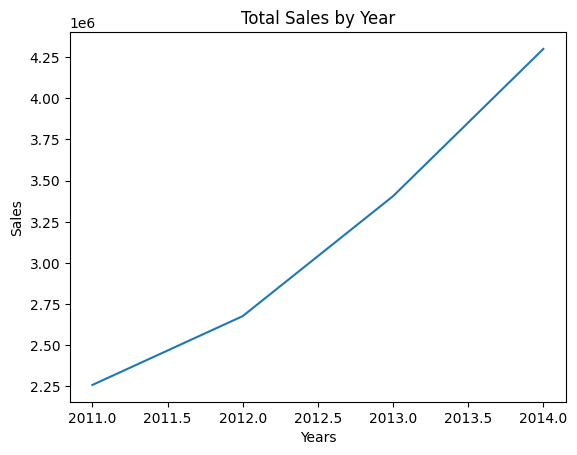

In [73]:
df_sa=df.groupby('year').sum()['sales']

df_sa.plot()
plt.title('Total Sales by Year')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

# Q2 Which are the top 10 products by sales?

### DISPLAY MOST SELLING PRODCUTS

In [74]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

#### GROUP SALES BY PRODUCT NAME

In [75]:
products_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
products_sales = products_sales.sort_values('sales',ascending=False)

### TOP 10 MOST SALES PRODUCTS 

In [76]:
# products_sales.head(10)
products_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### TOP 10 LOWEST SALES PRODUCTS 

In [77]:
products_sales.tail(10)

,sales
product_name,
Newell 308,8.400
Stockwell Gold Paper Clips,8.096
4009 Highlighters,8.040
Xerox 1989,7.968
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",7.800
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700
Grip Seal Envelopes,7.072
Xerox 20,6.480
Avery 5,5.760


# Which are the most quantity selling product ?

#### GROUP QUANTITY BY PRODUCT NAME

In [78]:
products_by_quantity = pd.DataFrame(df.groupby('product_name').sum()['quantity'])
products_by_quantity = products_by_quantity.sort_values('quantity',ascending=False)
# products_by_quantity.sort_values('quantity',ascending=False,inplace=True)

#### TOP 10 MOST QUANTITY SELLING PRODUCTS ITEMS

In [79]:
products_by_quantity.head(10)
# products_by_quantity[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


#### TOP 10 LOWEST QUANTITY SELLING PRODUCTS ITEMS

In [80]:
products_by_quantity.tail(10)

,quantity
product_name,
Avery 5,2
NeatDesk Desktop Scanner & Digital Filing System,2
Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner,2
Ultra Commercial Grade Dual Valve Door Closer,2
"Chromcraft Training Table, Adjustable Height",1
Penpower WorldCard Pro Card Scanner,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
Boston 1900 Electric Pencil Sharpener,1
Xerox 20,1


# Which is the most prefered ship mode 

In [81]:
pd.set_option('display.max_columns', None)

In [82]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01


In [83]:
# df.ship_mode.value_counts().reset_index()
# or

df_shipmode = pd.DataFrame(df['ship_mode'].value_counts()).reset_index()
df_shipmode = df_shipmode.sort_values("ship_mode",ascending=False)

df_shipmode.head()


,ship_mode,count
0,Standard Class,30775
1,Second Class,10309
3,Same Day,2701
2,First Class,7505


#### VISUALIZE MOST USED SHIP MODS

<Axes: xlabel='ship_mode', ylabel='count'>

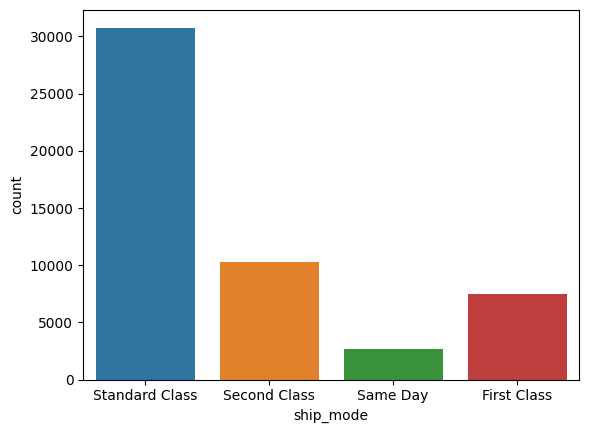

In [84]:
sns.countplot(x='ship_mode', data=df)


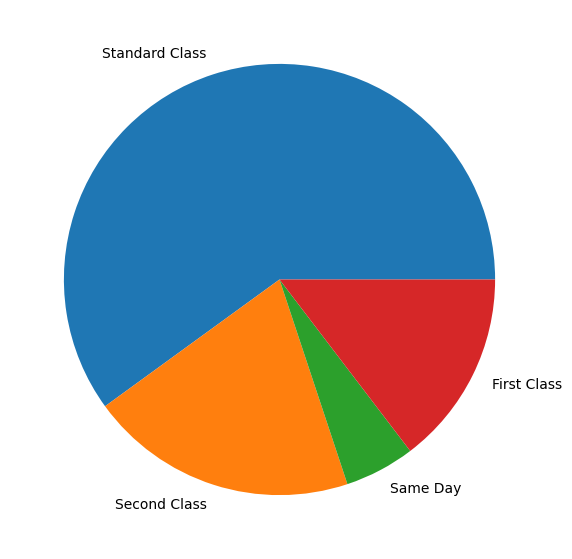

In [85]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df_shipmode['count'], labels = df_shipmode['ship_mode'])
  
# show plot
plt.show()

# Which are the most profitable catergory and sub cagtegaory ?

In [86]:
df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01


In [87]:
df.category.value_counts()

category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

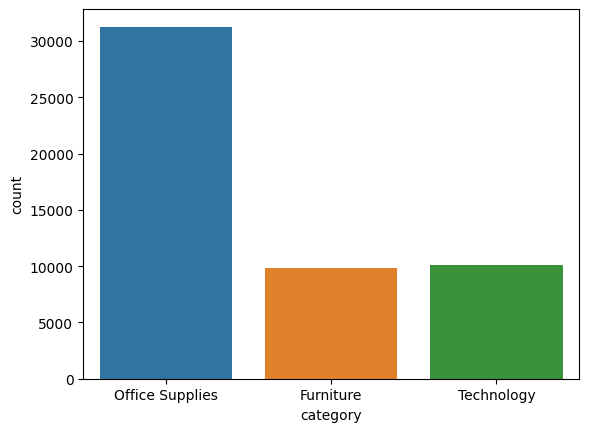

In [88]:
sns.countplot(x='category', data=df)

#### GROUP CATEGORY & SUBCATEGORY BY PROFIT

In [89]:
cat_subcat=pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

In [90]:
cat_subcat=cat_subcat.sort_values(by=['category','profit'], ascending=False)
cat_subcat


profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

#### VISUALIZE PROFIT DISTRIBUTION BY CATEGORY & SUBCATEGORY 

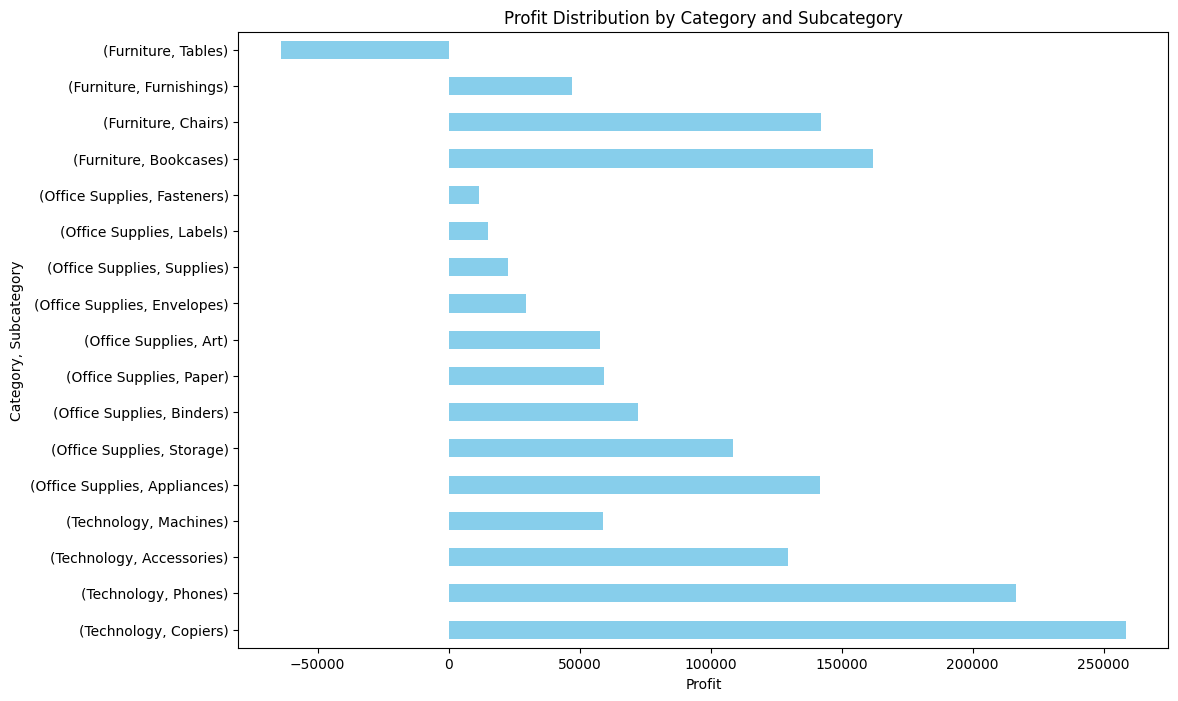

In [91]:
# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
cat_subcat['profit'].plot(kind='barh', color='skyblue')
plt.xlabel('Profit')
plt.ylabel('Category, Subcategory')
plt.title('Profit Distribution by Category and Subcategory')
plt.show()


### SUB - CATEGORIES BY SHIPING COST

In [92]:
df_shipping_cost= pd.DataFrame(df.groupby('sub_category').sum()['shipping_cost'])
df_shiping_cost_sort = df_shipping_cost.sort_values('shipping_cost',ascending=False)
df_shiping_cost_sort

,shipping_cost
sub_category,
Phones,184902.4920
Chairs,164229.3520
Copiers,159496.2049
Bookcases,155481.9670
Storage,120546.0320
Appliances,108300.5860
Accessories,83513.3340
Tables,79861.3940
Machines,79135.8485


### SHIPING COST OF DIFFERENT COUNTRY BY CATEGORY & SUBCATEGORY OF PRODUCT

In [93]:
df_shipping_cost= pd.DataFrame(df.groupby(['country','category','sub_category']).sum()['shipping_cost'])
# df_shiping_cost_sort = df_shipping_cost.sort_values(by=['category','shipping_cost'],ascending=False)
df_shiping_cost_sort = df_shipping_cost.sort_values(by=['country','shipping_cost'],ascending=False)
df_shiping_cost_sort



shipping_cost
country     category        sub_category               
Zimbabwe    Furniture       Chairs                76.56
            Office Supplies Art                   71.17
                            Appliances            53.31
            Technology      Copiers               39.59
            Furniture       Bookcases             37.43
...                                                 ...
Afghanistan Office Supplies Supplies              36.01
                            Binders               33.82
            Technology      Machines              14.10
            Office Supplies Labels                 8.32
                            Fasteners              4.41

[1966 rows x 1 columns]

### DISCOUNTS BY SUB - CATEGORIES

In [94]:
df_discount = pd.DataFrame(df.groupby('sub_category').sum()['discount'])
df_discount_sort = df_discount.sort_values('discount',ascending=False)
df_discount_sort

,discount
sub_category,
Binders,1102.480
Storage,700.490
Art,573.080
Chairs,560.120
Phones,489.610
Furnishings,478.880
Paper,387.300
Bookcases,370.710
Accessories,370.480


### DISTRIBUTION OF DAYS TO SHIPMENT

In [95]:
df['shiping_days'] = df['ship_date']-df['order_date']
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year,shiping_days
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,2011-01,5 days
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,2011-01,7 days
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,2011-01,4 days
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,2011-01,4 days
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,2011-01,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12,4 days
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12,5 days
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12,2 days
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12,6 days


In [96]:
df['shiping_days'].value_counts()

shiping_days
4 days    14434
5 days    11221
2 days     7026
6 days     6255
3 days     5035
7 days     3057
0 days     2600
1 days     1662
Name: count, dtype: int64

### TOP 15 COUNTRY BY SALES

In [97]:
df['country'].value_counts().head(15)

country
United States         9994
Australia             2837
France                2827
Mexico                2644
Germany               2065
China                 1880
United Kingdom        1633
Brazil                1599
India                 1555
Indonesia             1390
Turkey                1378
Italy                 1108
Nigeria                905
Spain                  859
Dominican Republic     742
Name: count, dtype: int64

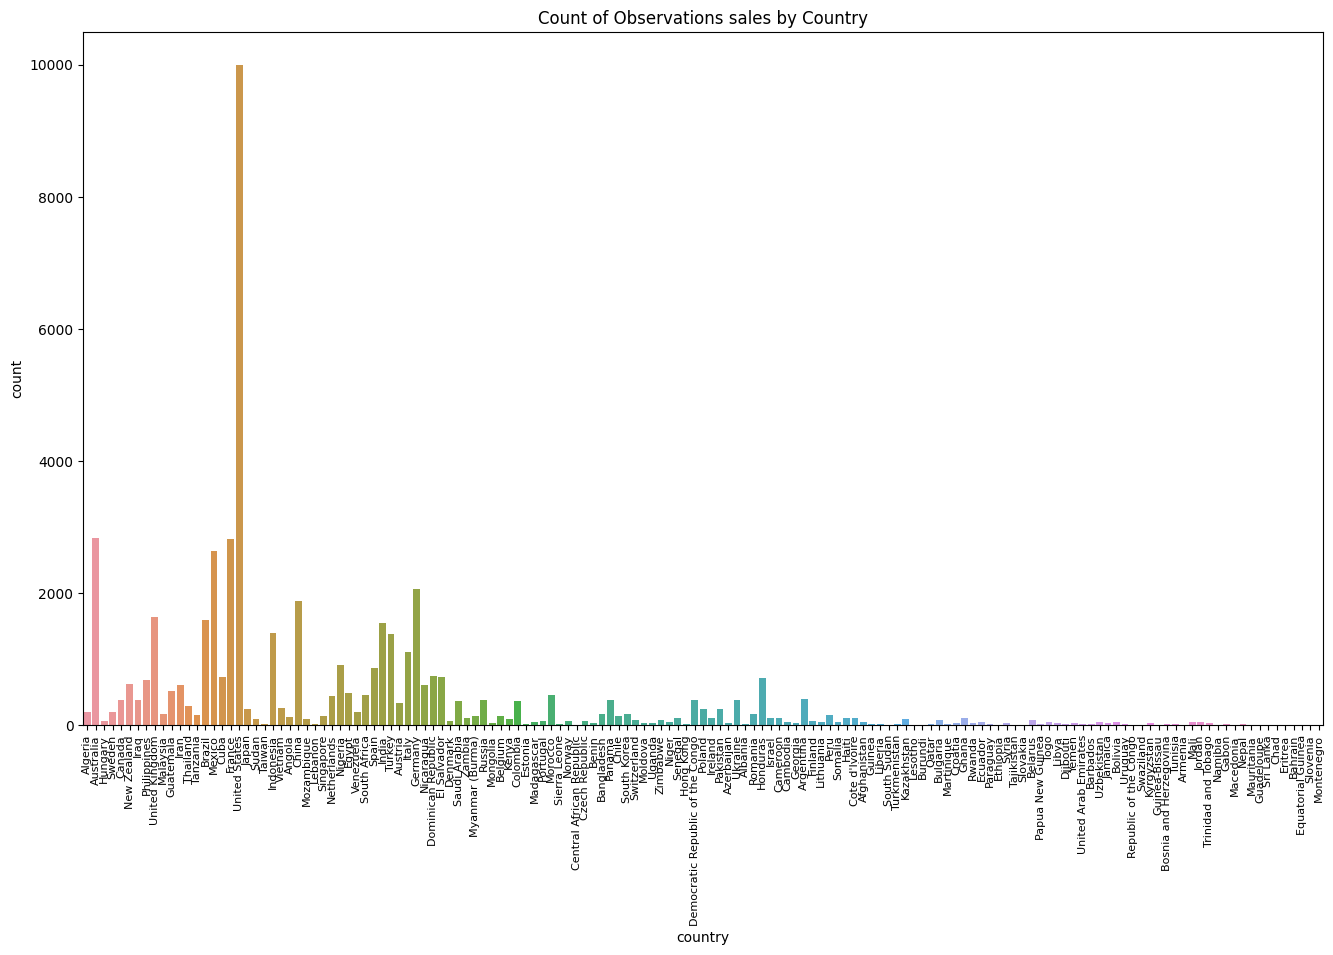

In [98]:
# sns.countplot(df['market'])
# plt.show()

plt.figure(figsize=(16, 9))

sns.countplot(data=df, x='country')
plt.xticks(rotation='vertical',size=8)
plt.title('Count of Observations sales by Country')
plt.show()

### TOP 15 SALE BY MARKET

In [99]:
df['market'].value_counts().head(15)

market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

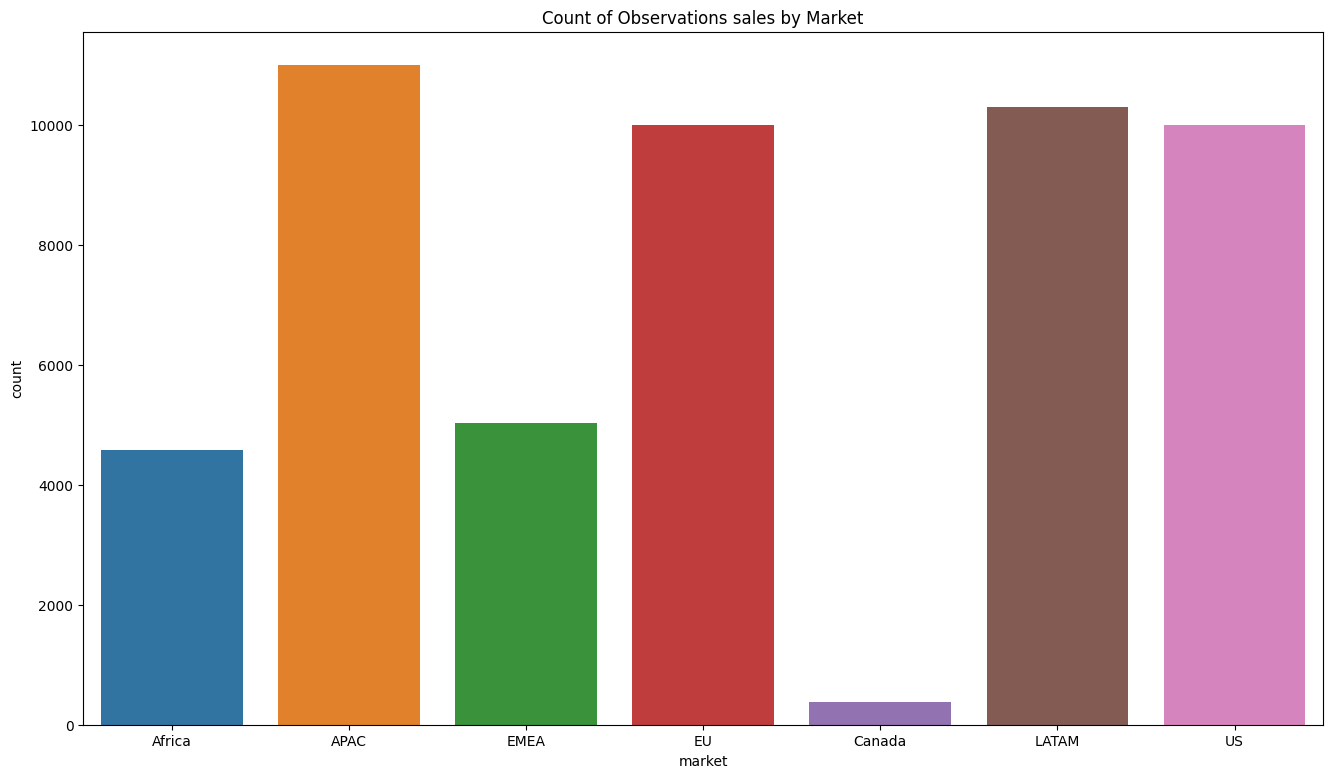

In [100]:


# sns.countplot(df['market'])
# plt.show()

plt.figure(figsize=(16, 9))

sns.countplot(data=df, x='market')
plt.title('Count of Observations sales by Market')
plt.show()

### MOST SELLING SEGMENTS

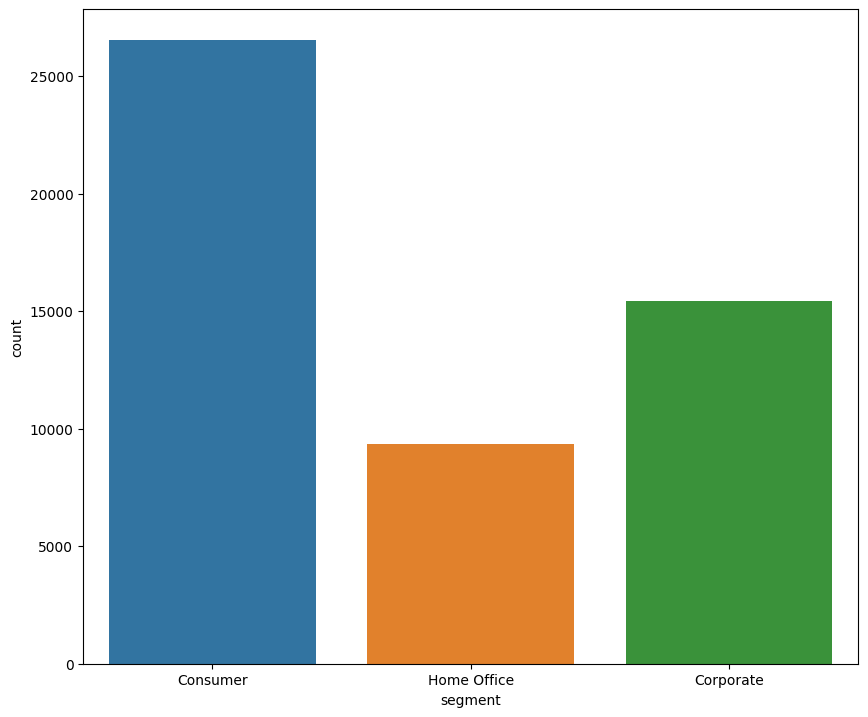

In [101]:
plt.figure(figsize=(10,8.5))

sns.countplot(data=df,x='segment')
plt.show()

### SEGMENTS BY SELLING QUANTITY

In [102]:
by_segment = pd.DataFrame(df.groupby('segment').sum()['quantity'])
by_segment_sort = by_segment.sort_values('quantity',ascending=False)
by_segment_sort

,quantity
segment,
Consumer,92157
Corporate,53565
Home Office,32590


### SEGMENTS BY PROFIT

In [103]:
by_segment_p = pd.DataFrame(df.groupby('segment').sum()['profit'])
by_segment_sort_p = by_segment_p.sort_values('profit',ascending=False)
by_segment_sort_p

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


What category sold the most?--- consumer
Which are the most profitable category?-- Technology
Total sales values by category and subcategory-
Which are the most selling products in subcategory?
Which customer segments are the most profitable ?
What shipping modes sold the most products?
Visualize the 'Category' column from the Shipmode column dataset standpoints.
What market sold the most products?
Which are the Top 10 country by sales?
Which are the average shipping cost for top 10 different countries?
Who are the top-10 most profitable customers?
Total sales values by year and month.